# Import Packages

In [3]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Dataset & Pre-Process

### Read CSV

In [4]:
df = pd.read_csv(os.path.join('filter-data-cleaned.csv'))
df.head(3)

,company_name,quote_id,description,qty,unit_price,filter_efficiency,dimensions,item_type,Length,Height,Gutter,Depth,Pockets,Date
0,A Preditiva,17171.0,Filtros MV/G4.625.500.50,36.0,7.5,G4,625.500.50,standard_filter,625.0,500.0,50.0,NaN,NaN,2017-12-11 18:11:37
1,A Preditiva,17171.0,Filtros F7/PL.625.500.50,36.0,27.5,F7,625.500.50,standard_filter,625.0,500.0,50.0,NaN,NaN,2017-12-11 18:11:37
2,A Preditiva,17175.0,Filtros F7/PL.592.490.48,16.0,28.5,F7,592.490.48,standard_filter,592.0,490.0,48.0,NaN,NaN,2017-12-14 17:58:47


### Drop Non important columns

Dropped columns:
- description
- dimensions
- depth
- pockets
- item_type

In [5]:
df_essential = df.drop(columns=['description', 'dimensions', 'Depth', 'Pockets', 'item_type'])

Set quote_id and qty columns values as integers

In [6]:
df_essential[['quote_id', 'qty']] = df_essential[['quote_id', 'qty']].astype(int) 

Set Date columns values as TimeStamp

In [7]:
df_essential['Date'] = pd.to_datetime(df_essential['Date'])

Rename column names

In [8]:
df_essential.rename(columns = {'company_name':'Company Name', 'quote_id':'Quote ID',
                                'qty':'Ordered Quantity', 'unit_price': 'Unit Price', 
                                'filter_efficiency': 'Efficiency'}, inplace = True)

In [9]:
df_essential.head()

,Company Name,Quote ID,Ordered Quantity,Unit Price,Efficiency,Length,Height,Gutter,Date
0,A Preditiva,17171,36,7.5,G4,625.0,500.0,50.0,2017-12-11 18:11:37
1,A Preditiva,17171,36,27.5,F7,625.0,500.0,50.0,2017-12-11 18:11:37
2,A Preditiva,17175,16,28.5,F7,592.0,490.0,48.0,2017-12-14 17:58:47
3,A Preditiva,18643,9,27.5,F7,592.0,592.0,45.0,2018-09-17 17:06:28
4,A Preditiva,18643,3,17.5,F7,287.0,592.0,45.0,2018-09-17 17:06:28


In [10]:
np.sort(list(df_essential['Efficiency'].value_counts().index))

array(['F5', 'F6', 'F7', 'F8', 'F9', 'G2', 'G3', 'G4', 'H11', 'H13',
       'H14', 'H3', 'M5', 'M6'], dtype='<U3')

# Exploratory Data Analysis

Given the pre-processed dataframe lets analyse how data is distributed.

Firstly, let adapt the 'Efficiency' column. Since it is a class feature we can map the efficiency of each filter using a key:
- G : 1 (filtragem Grosseira)
- M : 2 (filtragem Média)
- F : 3 (filtragem Fina)
- H : 4 (filtragem Especial)

In [11]:
df_numerical = df_essential.copy()

# Create a mapping between letters and numerical keys
letter_key_mapping = {'G': 1, 'M': 2, 'F': 3, 'H': 4}

df_numerical.insert(5, '# Efficiency', '')

# Extract the letters from the 'filter_efficiency' column
df_numerical['efficiency_key'] = df_numerical['Efficiency'].str.extract('([A-Za-z])')

# Map letters to numerical keys
df_numerical['# Efficiency'] = df_numerical['efficiency_key'].map(letter_key_mapping)

# Drop the intermediate 'efficiency_key' column
df_numerical = df_numerical.drop('efficiency_key', axis=1)

### Pair-Plot

Drop non numerical features or irrelevant ones

In [12]:
df_numerical = df_numerical.drop(columns = ['Company Name', 'Efficiency', 'Quote ID'], axis = 1)
df_numerical['Date'] = df_numerical['Date'].dt.year

Build the pair-plot

<Figure size 1000x1000 with 0 Axes>

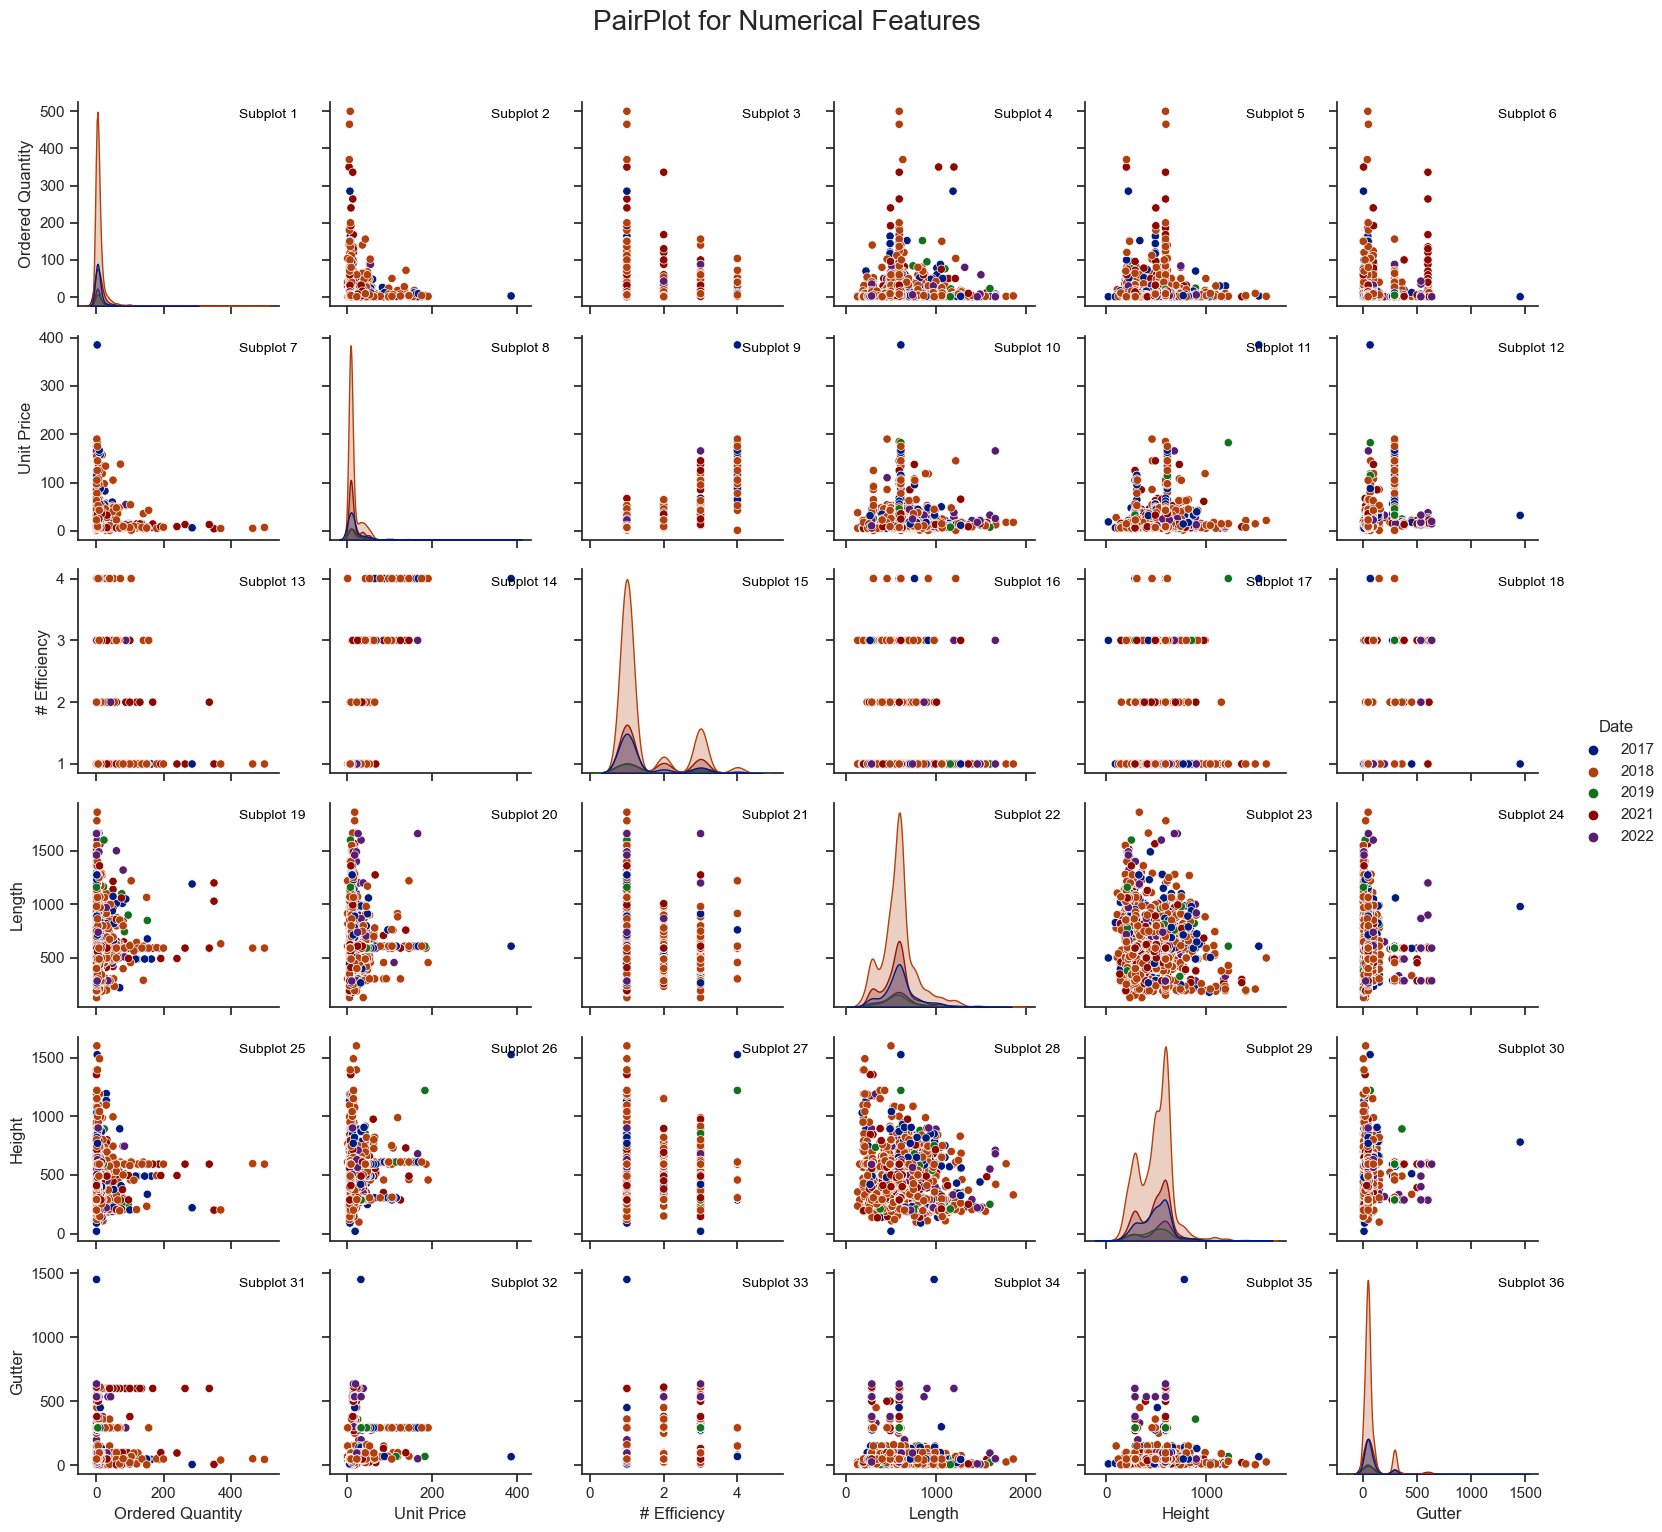

In [13]:
# Set style for seaborn
sns.set(style="ticks")

fig = plt.figure(figsize =(10, 10))

# Create a pair plot with scatterplots for numerical columns
plot = sns.pairplot(df_numerical, kind='scatter', diag_kind='kde',
                     markers='o', hue='Date', palette='dark')

# Set plot title
plot.fig.suptitle("PairPlot for Numerical Features", y=1.02, fontsize = 20)

# Move the legend box to the right
plot._legend.set_bbox_to_anchor((1.05, 0.5))

# Add numeration to each subplot
for i, ax in enumerate(plot.axes.flat):
    ax.annotate(f'Subplot {i+1}', (0.8, 0.92), xycoords='axes fraction',
                fontsize=10, color='black')


# Adjust the layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

### ---> Analysis

1) Unit Price VS Quantity (subplot 2 and 7): 

The principle of **Economies of Scale** is evident. When the quote presents a higher quantity of a given filter, the price per unit decreases, the reverse situation is also verified.

2) Gutter, Height and Length: 

Each **dimension-feature is represented by at least 2 key measurements**
(eg. Gutter has a majoraty of quotes as 48mm and 45mm and Length has a majoraty of quotes as 592mm and 287mm)
This means that the filter dimensions may be important for further filter classification, if needed.

3) Price Unit VS Efficiency (subplot 3 and 14):

The best the filtering is, more expensive. Price Unit shows a consistent increase with the efficiency of the filtering, with some outliers that might relate with company 'friendly' deals

4) Year of purchase: Data does not show a clear correlation between Date and any of the features. Even so, by looking at the diagonal plots, the year 2018 is without a doubt the year when was sold the greatest amount of filters.


### Box-Plots

Build the Box-Plots, might be useful

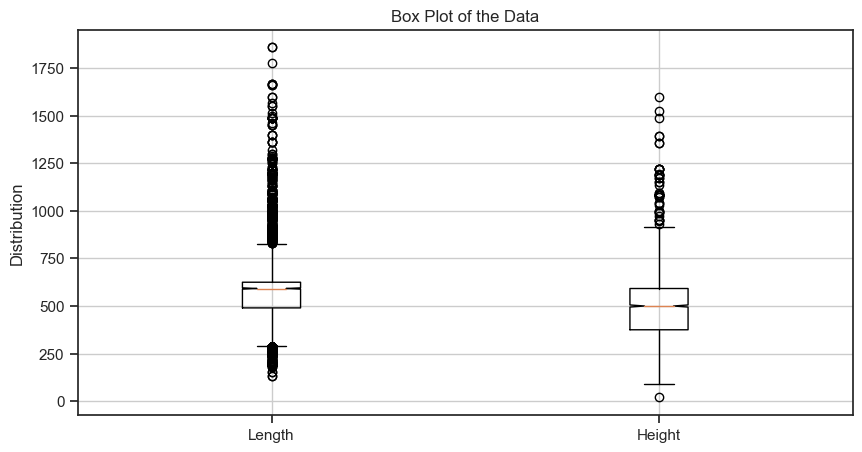

In [66]:
fig = plt.figure(figsize=(10, 5))

# Creating the boxplot
plt.boxplot(df_numerical.drop(['Date', 'Ordered Quantity', 'Unit Price', '# Efficiency', 'Gutter'], axis=1), notch=True)

# Adding title and axis labels
plt.title("Box Plot of the Data")
# plt.xlabel("Features")
plt.ylabel("Distribution")
plt.xticks(np.arange(len(df_numerical.drop(['Date', 'Ordered Quantity', 'Unit Price', '# Efficiency', 'Gutter'], axis = 1).columns))+1,
            labels = df_numerical.drop(['Date', 'Ordered Quantity', 'Unit Price', '# Efficiency', 'Gutter'], axis=1).columns.to_list())
# Adding grid lines
plt.grid(True)

# Show the plot
plt.show()

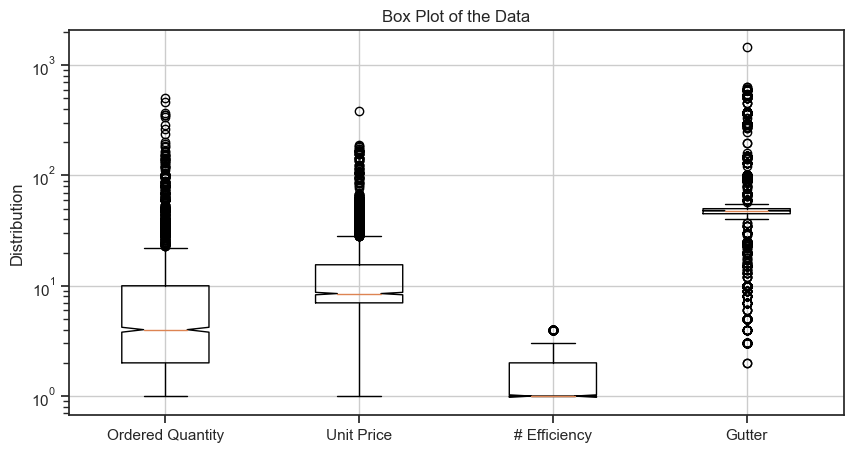

In [67]:
fig = plt.figure(figsize=(10, 5))

# Creating the boxplot
plt.boxplot(df_numerical.drop(['Date', 'Length', 'Height'], axis=1), notch=True)

# Adding title and axis labels
plt.title("Box Plot of the Data")
# plt.xlabel("Features")
plt.ylabel("Distribution")

plt.xticks(np.arange(len(df_numerical.drop(['Date', 'Length', 'Height'], axis = 1).columns))+1,
            labels = df_numerical.drop(['Date', 'Length', 'Height'], axis=1).columns.to_list())

# Adding grid lines
plt.grid(True)
plt.yscale('log')
# Show the plot
plt.show()

### ---> Analysis

1) **Box (Interquartile Range - IQR):** The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). It contains the middle 50% of the data.

2) **Line inside the Box (Median):** The line inside the box is the median, which is the middle value of the dataset when it's sorted.

3) **Whiskers:** The whiskers extend from the box to the minimum and maximum values within a certain range. The range is often calculated as 1.5 times the IQR. Any data points beyond the whiskers are considered outliers.

4) **Outliers:** Individual points outside the whiskers are considered outliers. They can be indications of potentially interesting or unusual data points.

- If the box is skewed towards the lower whisker, it suggests that the lower half of the data is more spread out.
- If the box is skewed towards the upper whisker, it suggests that the upper half of the data is more spread out.
-  the box is symmetrical, the lower and upper halves of the data are similarly spread.
The length of the whiskers and the presence of outliers provide information about the variability of the data.

### Correlation Matrix

In [68]:
def plot_corr_matrix(df):
    # Set the size of the plot
    plt.subplots(figsize=(12, 5))
    
    # Calculate the correlation matrix and round the values to two decimal places
    correlation = round(df.corr(), 2)
    
    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    
    # Add a title to the plot
    plt.title('Correlation between numerical variables')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=30)

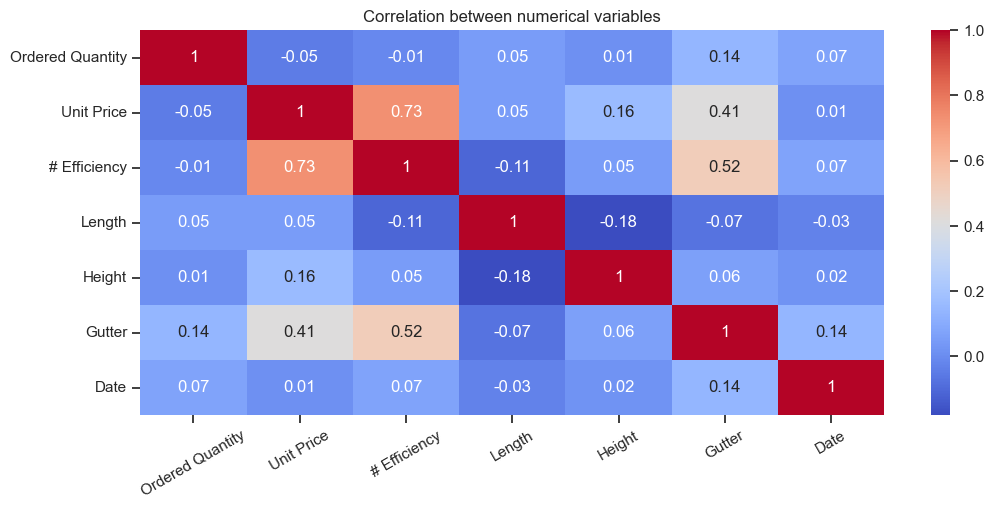

In [69]:
plot_corr_matrix(df_numerical)

### ---> Analysis

**1. Ordered Quantity and Unit Price (-0.05):**
   - *Explanation:* Negative correlation indicates that as ordered quantity increases, unit price tends to decrease slightly. This aligns with the concept of "quantity discount" or "economies of scale."

**2. Unit Price and # Efficiency (0.73):**
   - *Explanation:* High positive correlation suggests that more efficient filters tend to have higher unit prices. This is likely due to the advanced technologies or materials associated with higher efficiency.

**3. # Efficiency and Length (-0.11):**
   - *Explanation:* Negative correlation implies that filters with higher efficiency are shorter. This may be attributed to achieving desired filtration with a smaller physical size, reducing material costs.

**4. Gutter Measure and Unit Price (0.41):**
   - *Explanation:* Positive correlation indicates that filters with higher unit prices tend to have a higher measure of gutters. Higher gutter measures may contribute to increased production costs.

**5. Gutter Measure and # Efficiency (0.52):**
   - *Explanation:* Positive correlation suggests that filters with higher efficiency also tend to have a higher measure of gutters. Advanced filters designed for better efficiency may be associated with higher gutter measures.

**6. Date and Gutter Measure (0.14):**
   - *Explanation:* Positive correlation implies an increase in the measure of gutters in filter designs over time. This may be attributed to technological advancements or shifts in customer preferences affecting the measure of gutters.

#### Conclusion: 

- There are similar relation between the filter dimensions and the unit price feature which indicate it might be a good idea to merge the dimensions into a "Volume" feature (V=LxGxH). So bigger dimensions/Volume leads to higher prices.
- The "economies of scale" principle is confirmed.
- There is a clear correlation between the unit price and efficiency of the filter (better filtering is more expensive).
- Better filtering means thicker filters (higher gutters).
- Covid-19 might have lead to an increase of thicker filters (higher gutter) due to better filtering performances.


### Which client has the most amount of ordered filters and money spent?

Creating a feature called 'Total Price' that means the amount of money spent in each type of ordered filters

In [18]:
df_clients_plot = df_essential.copy()
df_clients_plot['Total Price'] = df_clients_plot['Ordered Quantity'] * df_clients_plot['Unit Price']

Calculating the all time total amount of money spent by each company and the total number of quotes proposed to each company 

In [71]:
# Grouping data by 'Company Name' and calculating the sum of 'Total Price' for each company
tot_price_company = df_clients_plot.groupby(['Company Name'])['Total Price'].sum()

# Grouping data by 'Company Name' and calculating the number of unique 'Quote ID' for each company
tot_quote_company = df_clients_plot.groupby(['Company Name'])['Quote ID'].unique().apply(len)

# Grouping data by 'Company Name' and calculating the sum of 'Ordered Quantity' for each company
tot_quantity_company = df_clients_plot.groupby(['Company Name'])['Ordered Quantity'].sum()

# Creating a new DataFrame with the calculated values for each company
df_clients_plot_clustering = pd.DataFrame({'Quote Amount': tot_quote_company,
                                            'Total Money': tot_price_company,
                                            'Total Quantity': tot_quantity_company})

# Calculating the ratio of 'Total Money' to 'Quote Amount' for each company
money_quote_ratio = df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Total Money'] / df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Quote Amount']

# Calculating the ratio of 'Total Money' to 'Total Quantity' for each company
money_quantity_ratio = df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Total Money'] / df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Total Quantity']


Plotting the all time total money spent by each client  and identifying the group of clients that represent more than 1k € income

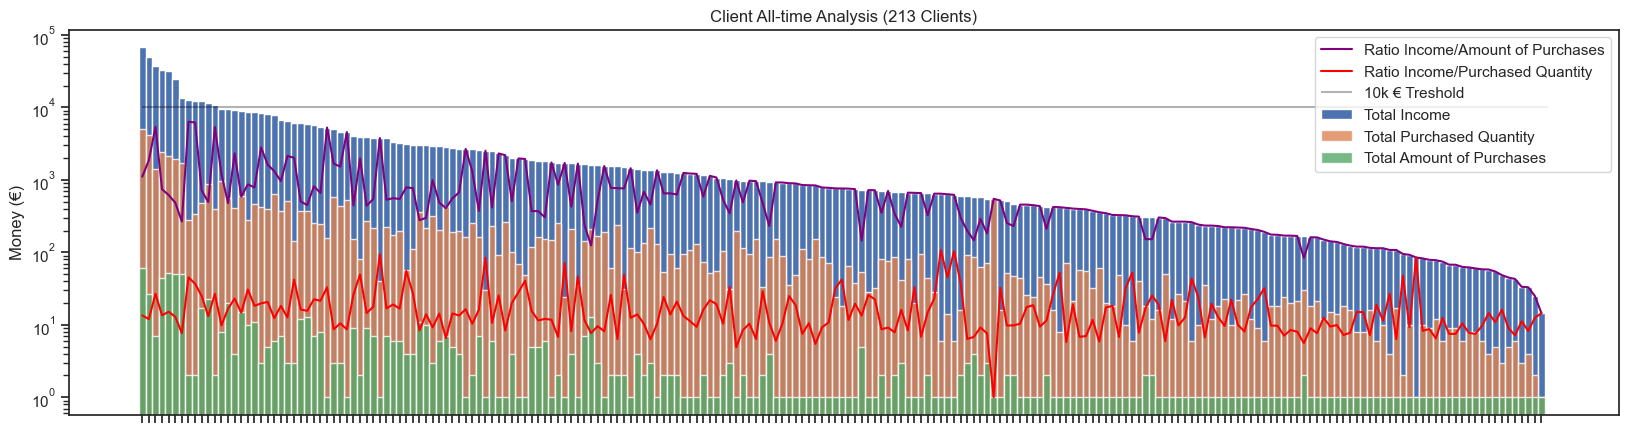

In [72]:
# Set the size of the figure
plt.figure(figsize=(20, 5))

# Set the title of the plot
plt.title('Client All-time Analysis (213 Clients)')

# Bar plot for 'Total Income' for each company
plt.bar(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
        df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Total Money'],
        label='Total Income', align='center', width=1)

# Bar plot for 'Total Purchased Quantity' for each company
plt.bar(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
        df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Total Quantity'],
        label='Total Purchased Quantity', alpha=0.8, align='center', width=1)

# Bar plot for 'Total Amount of Purchases' for each company
plt.bar(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
        df_clients_plot_clustering.sort_values('Total Money', ascending=False)['Quote Amount'],
        label='Total Amount of Purchases', alpha=0.8, align='center', width=1)

# Line plot for the ratio of 'Total Income' to 'Total Amount of Purchases' for each company
plt.plot(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
         money_quote_ratio, label='Ratio Income/Amount of Purchases', color='purple')

# Line plot for the ratio of 'Total Income' to 'Purchased Quantity' for each company
plt.plot(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
         money_quantity_ratio, label='Ratio Income/Purchased Quantity', color='red')

# Set x-axis ticks and labels
plt.xticks(np.arange(len(df_clients_plot_clustering.sort_values('Total Money', ascending=False))),
           rotation=0, fontsize=6, color='white')

# Due to anonymization issues
plt.xlabel("")

# Set y-axis scale to logarithmic
plt.yscale('log')

# Set y-axis label
plt.ylabel('Money (€)')

# Draw a horizontal line at 10,000€ for reference
plt.hlines(10000, xmin=0, xmax=len(tot_price_company), colors='black',
           label='10k € Treshold', alpha=0.3)

# Display legend
plt.legend()


### ---> Analysis
1. Income-Based Client Segmentation:

Organizing clients by income reveals a noteworthy trend: a minority significantly contributes, while almost half generate modest amounts. Strategic grouping of high-value clients during model planning could optimize revenue. Personalized models for these clients, predicting tailored prices, may enhance overall company revenue.

2. Income/Amount of Purchases Ratio Analysis:

Analysis of the Income/Amount of Purchases Ratio identifies clients allocating substantial income to few purchases. For high-value clients, it signals a propensity for larger spending per transaction. Crafting algorithms around these clients can boost income in key transactions, making this ratio crucial for strategic consideration.

3. Income/Purchased Quantity of Filters Ratio Examination:

Delving into the Income/Purchased Quantity of Filters Ratio unveils clients accepting higher unit prices. Focusing on this minority may yield sustained price growth, translating to elevated incomes over time. This ratio provides insights into potential prolonged financial gains through targeted investment.

4. Client Clustering Strategy:

Given the diverse customer profile, adopting a client clustering strategy emerges as potent. This involves leveraging insights from companies amenable to higher-priced filter proposals. Clustering enhances the model's predictive prowess, facilitating tailored pricing models for distinct customer segments. This approach allows for nuanced and effective pricing strategies.

It might be financially interesting know the profile of clients with high ratio of money spent per quote and try to group the most valuable clients in order better propose new quotes to them, and possibly take advantage of the high income they might generate

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



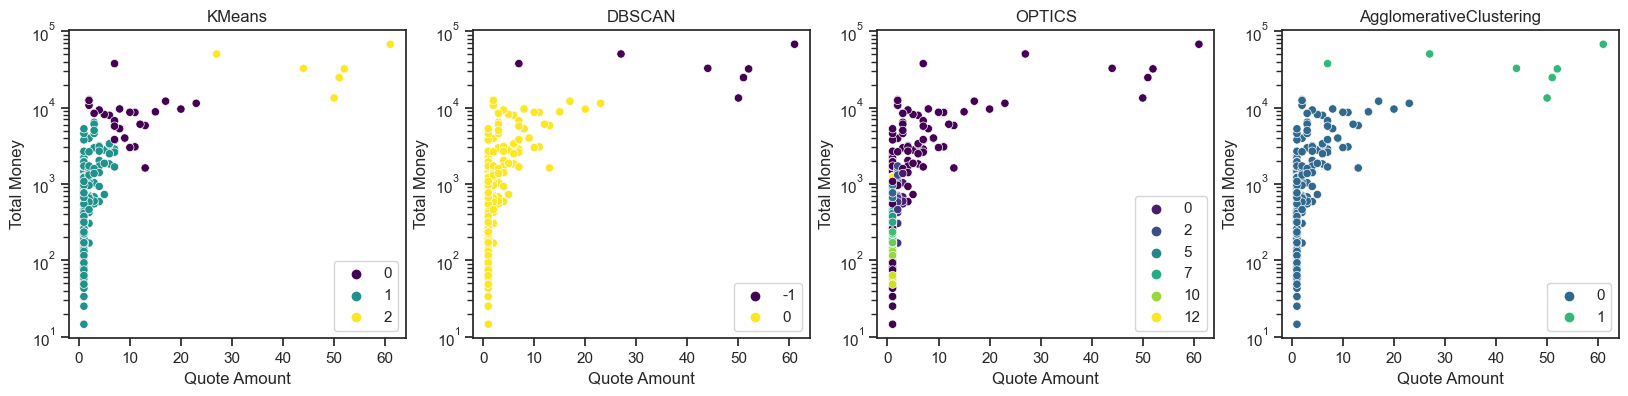

In [73]:
from sklearn.cluster import KMeans, OPTICS, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# List of clustering methods to be applied
clustering_method = [KMeans, DBSCAN, OPTICS, AgglomerativeClustering]

def clustering_companies(df, clustering_method):
    # Extract the relevant features for clustering
    X = df[['Quote Amount', 'Total Money']]

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Set the figure size before creating subplots
    plt.figure(figsize=(20, len(clustering_method)))

    # Iterate through each clustering method
    for i, method in enumerate(clustering_method):
        # Apply the clustering method to the standardized data
        if 'KMeans' in str(method):
            number_clusters = 3
            df['Cluster'] = method(number_clusters).fit_predict(X_scaled)
        elif 'DBSCAN' in str(method):
            df['Cluster'] = method(eps=1).fit_predict(X_scaled)
        else:
            df['Cluster'] = method().fit_predict(X_scaled)

        # Create subplots for each clustering method
        plt.subplot(1, len(clustering_method), i+1)

        # Visualize the clustered data using scatter plot
        sns.scatterplot(x='Quote Amount', y='Total Money', hue='Cluster', data=df, palette='viridis')
        
        # Set axis labels, scale, and title for each subplot
        plt.xlabel('Quote Amount')
        plt.ylabel('Total Money')
        plt.yscale('log')  # Set y-axis scale to logarithmic
        plt.title(str(clustering_method[i]).split('.')[-1][:-2])  # Extract method name for the title
        plt.legend()

    # Display the subplots
    plt.show()

# Call the function with the DataFrame and clustering methods
clustering_companies(df_clients_plot_clustering, clustering_method)


### ---> Analysis

This clustering attempt allows us to conclude that there are various valid ways to segment our market, mainly based on the total income certain clients produce.
There is an opportunity to study how different models trained within these well defined cluster of clients would impact the total income generated or even the maintenance of dear clients.

### Percentage of the data that corresponds to each filter efficiency

In [32]:
efficiency_distribution = df_essential['Efficiency'].value_counts()
efficiency_distribution

G4     2456
F7      560
M5      227
G3      207
F9      104
G2       77
M6       64
H13      37
H14      30
F8       10
H11       4
F5        2
H3        1
F6        1
Name: Efficiency, dtype: int64

### ---> Analysis

This simple ouput shows a clear representation of which filters are in conditions to be used in a predictive model, given their
high amount considering the total amount of proposals. We then concluded that using filters G4, M5 and F7 will be
beneficial for future analysis and the creation of predictive models for each filter is justified.

### How does Unit Price changes with the Volume of the filter for each efficiency?

Creation of a new feature "Volume" = $\frac{L \times H \times G}{10^9} \quad [m^3]$ 

In [22]:
df_essential['Volume'] = df_essential['Length']*df_essential['Height']*df_essential['Gutter']*10e-9

Interactive Scatter Plot of Unit Price VS Volume with Efficiency-based Color and Symbol Mapping

In [82]:
import plotly.express as px

# Check unique values in the 'Efficiency' column
unique_efficiencies = np.sort(list(df_essential['Efficiency'].unique()))

# Define a color palette for different efficiencies
palette = px.colors.qualitative.Safe

# Create a dictionary to map each unique efficiency to a valid symbol
symbol_map = dict(zip(unique_efficiencies, 
                      ["circle", "cross", "square", "star", "triangle-up", "triangle-down", "pentagon",
                       "square-open", "x", "star-triangle-up-dot", "diamond", "circle-open"]))

# Create a scatter plot using Plotly Express
fig = px.scatter(
    df_essential.reset_index(),
    x='Volume',
    y='Unit Price',
    color='Efficiency',  # Color points based on the 'Efficiency' column
    symbol='Efficiency',  # Use different symbols for each 'Efficiency' category
    title='Unit Price VS Volume',
    labels={'Volume (m3)': 'Volume', 'Unit Price €': 'Unit Price'},
    template='plotly_white',  # Set the plot template to 'plotly_white'
    color_discrete_sequence=palette,  # Set color sequence for discrete values
    symbol_map=symbol_map,  # Map symbols to 'Efficiency' categories
    log_x=True  # Use a logarithmic scale for the x-axis
)

# Define the figure height
fig.update_layout(height=500)

# Show the interactive plot inline
fig.show()


An interactive way of plotting data alows us to identify patterns and to infer about how meaningful is to create a model that can learn them in order to predict. 

(By clicking in the filters' label the plot changes automatically)

### ---> Analysis

- **G4, F7 and M5 Plot**: By plotting Unit Price VS Volume of G4, F7 and M5 filters, we conclude that a regression model is worth building given the pattern.
- **H Efficiency Plot**: Not enough data
- **G Efficiency Plot**: Is there really a global pattern?




### Which companies still order filters year after year?

In an attempt to see how companies ordered quantity changes over time

In [76]:
# Create a copy of df_essential and drop unnecessary columns
df_time_evo = df_essential.copy().drop(['Unit Price', 'Efficiency', 'Length', 'Height', 'Gutter', 'Volume'], axis=1)

# Convert the 'Date' column to datetime format using the specified format '%Y'
df_time_evo['Date'] = pd.to_datetime(df_time_evo['Date'], format='%Y')

# Display the first few rows of the DataFrame after modifications
df_time_evo.head()


,Company Name,Quote ID,Ordered Quantity,Date
0,A Preditiva,17171,36,2017-12-11 18:11:37
1,A Preditiva,17171,36,2017-12-11 18:11:37
2,A Preditiva,17175,16,2017-12-14 17:58:47
3,A Preditiva,18643,9,2018-09-17 17:06:28
4,A Preditiva,18643,3,2018-09-17 17:06:28


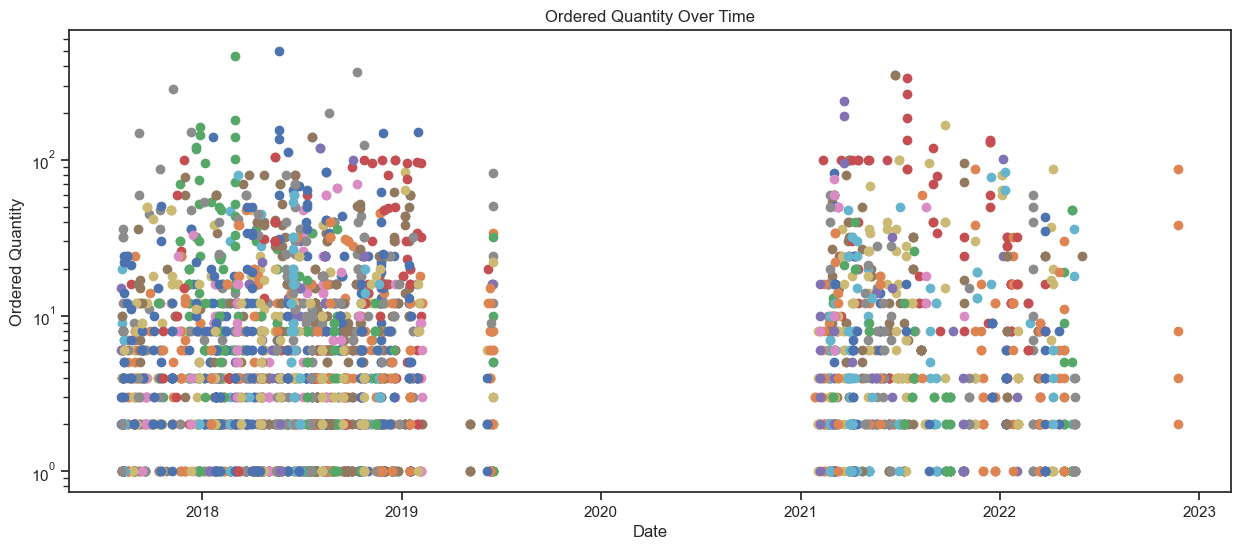

In [78]:
# Plot the data
plt.figure(figsize=(15, 6))

# Iterate through each company and group the data by 'Company Name'
for company, group in df_time_evo.sort_values('Date', ascending=True).groupby('Company Name'):
    # Scatter plot for each company, with 'Date' on the x-axis and 'Ordered Quantity' on the y-axis
    plt.scatter(group['Date'], group['Ordered Quantity'], label=company)

# Set y-axis scale to logarithmic
plt.yscale('log')

# Set plot title and axis labels
plt.title('Ordered Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Ordered Quantity')

# Display the legend to identify each company's data
# Uncomment the line below if you want to show the legend
# plt.legend()

# Show the plot
plt.show()

